In [57]:
# install matplotlib_venn
import sys
!{sys.executable} -m pip install matplotlib_venn

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sb

sb.set_theme()

%store -r final_data
%store -r hierar_countries
%store -r kmeans_countries

hierar_df = hierar_countries.copy()
kmeans_df = kmeans_countries.copy()

In [59]:
# Hierar_countries
print("Hierar countries: ")
print(hierar_df['country'])

Hierar countries: 
4                                Angola
18                                Benin
26                         Burkina Faso
27                              Burundi
29                             Cambodia
30                             Cameroon
32             Central African Republic
33                                 Chad
45     Democratic Republic of the Congo
53                    Equatorial Guinea
54                              Eritrea
56                             Ethiopia
68                               Guinea
70                                Haiti
85                                Kenya
89     Lao People's Democratic Republic
93                              Liberia
98                           Madagascar
99                               Malawi
102                                Mali
113                          Mozambique
114                             Myanmar
117                               Nepal
121                               Niger
128                  

In [60]:
# Hierar_countries
print("Kmeans countries: ")
print(kmeans_df['country'])

Kmeans countries: 
0                           Afghanistan
4                                Angola
18                                Benin
20     Bolivia (Plurinational State of)
26                         Burkina Faso
27                              Burundi
29                             Cambodia
30                             Cameroon
32             Central African Republic
33                                 Chad
37                              Comoros
38                                Congo
45     Democratic Republic of the Congo
47                             Djibouti
53                    Equatorial Guinea
54                              Eritrea
56                             Ethiopia
61                               Gambia
64                                Ghana
68                               Guinea
70                                Haiti
85                                Kenya
86                             Kiribati
89     Lao People's Democratic Republic
92                   

In [103]:
union = pd.Series(np.union1d(kmeans_df['country'], hierar_df['country']))
intersection = pd.Series(np.intersect1d(kmeans_df['country'], hierar_df['country']))
s1 = np.setdiff1d(kmeans_df['country'],intersection)
s2 = np.setdiff1d(hierar_df['country'],intersection)

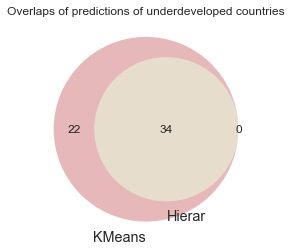

In [104]:
plt.title("Overlaps of predictions of underdeveloped countries")
venn2(subsets = (s1.size,s2.size,intersection.size), set_labels = ('KMeans', 'Hierar'))

In [105]:
# let's examine if we should include the 22 countries that are not in Hierarchical model
print(s1)

['Afghanistan' 'Bolivia (Plurinational State of)' 'Comoros' 'Congo'
 'Djibouti' 'Gambia' 'Ghana' 'Kiribati' 'Lesotho' 'Mauritania'
 'Micronesia (Federated States of)' 'Mongolia' 'Nigeria' 'Pakistan'
 'Senegal' 'Solomon Islands' 'Sudan' 'Swaziland' 'Tajikistan' 'Uzbekistan'
 'Vanuatu' 'Yemen']


In [107]:
final_data_cp = final_data.copy()
final_data_cp = final_data_cp[final_data_cp["country"].isin(s1)]
final_data_cp.shape

(22, 17)

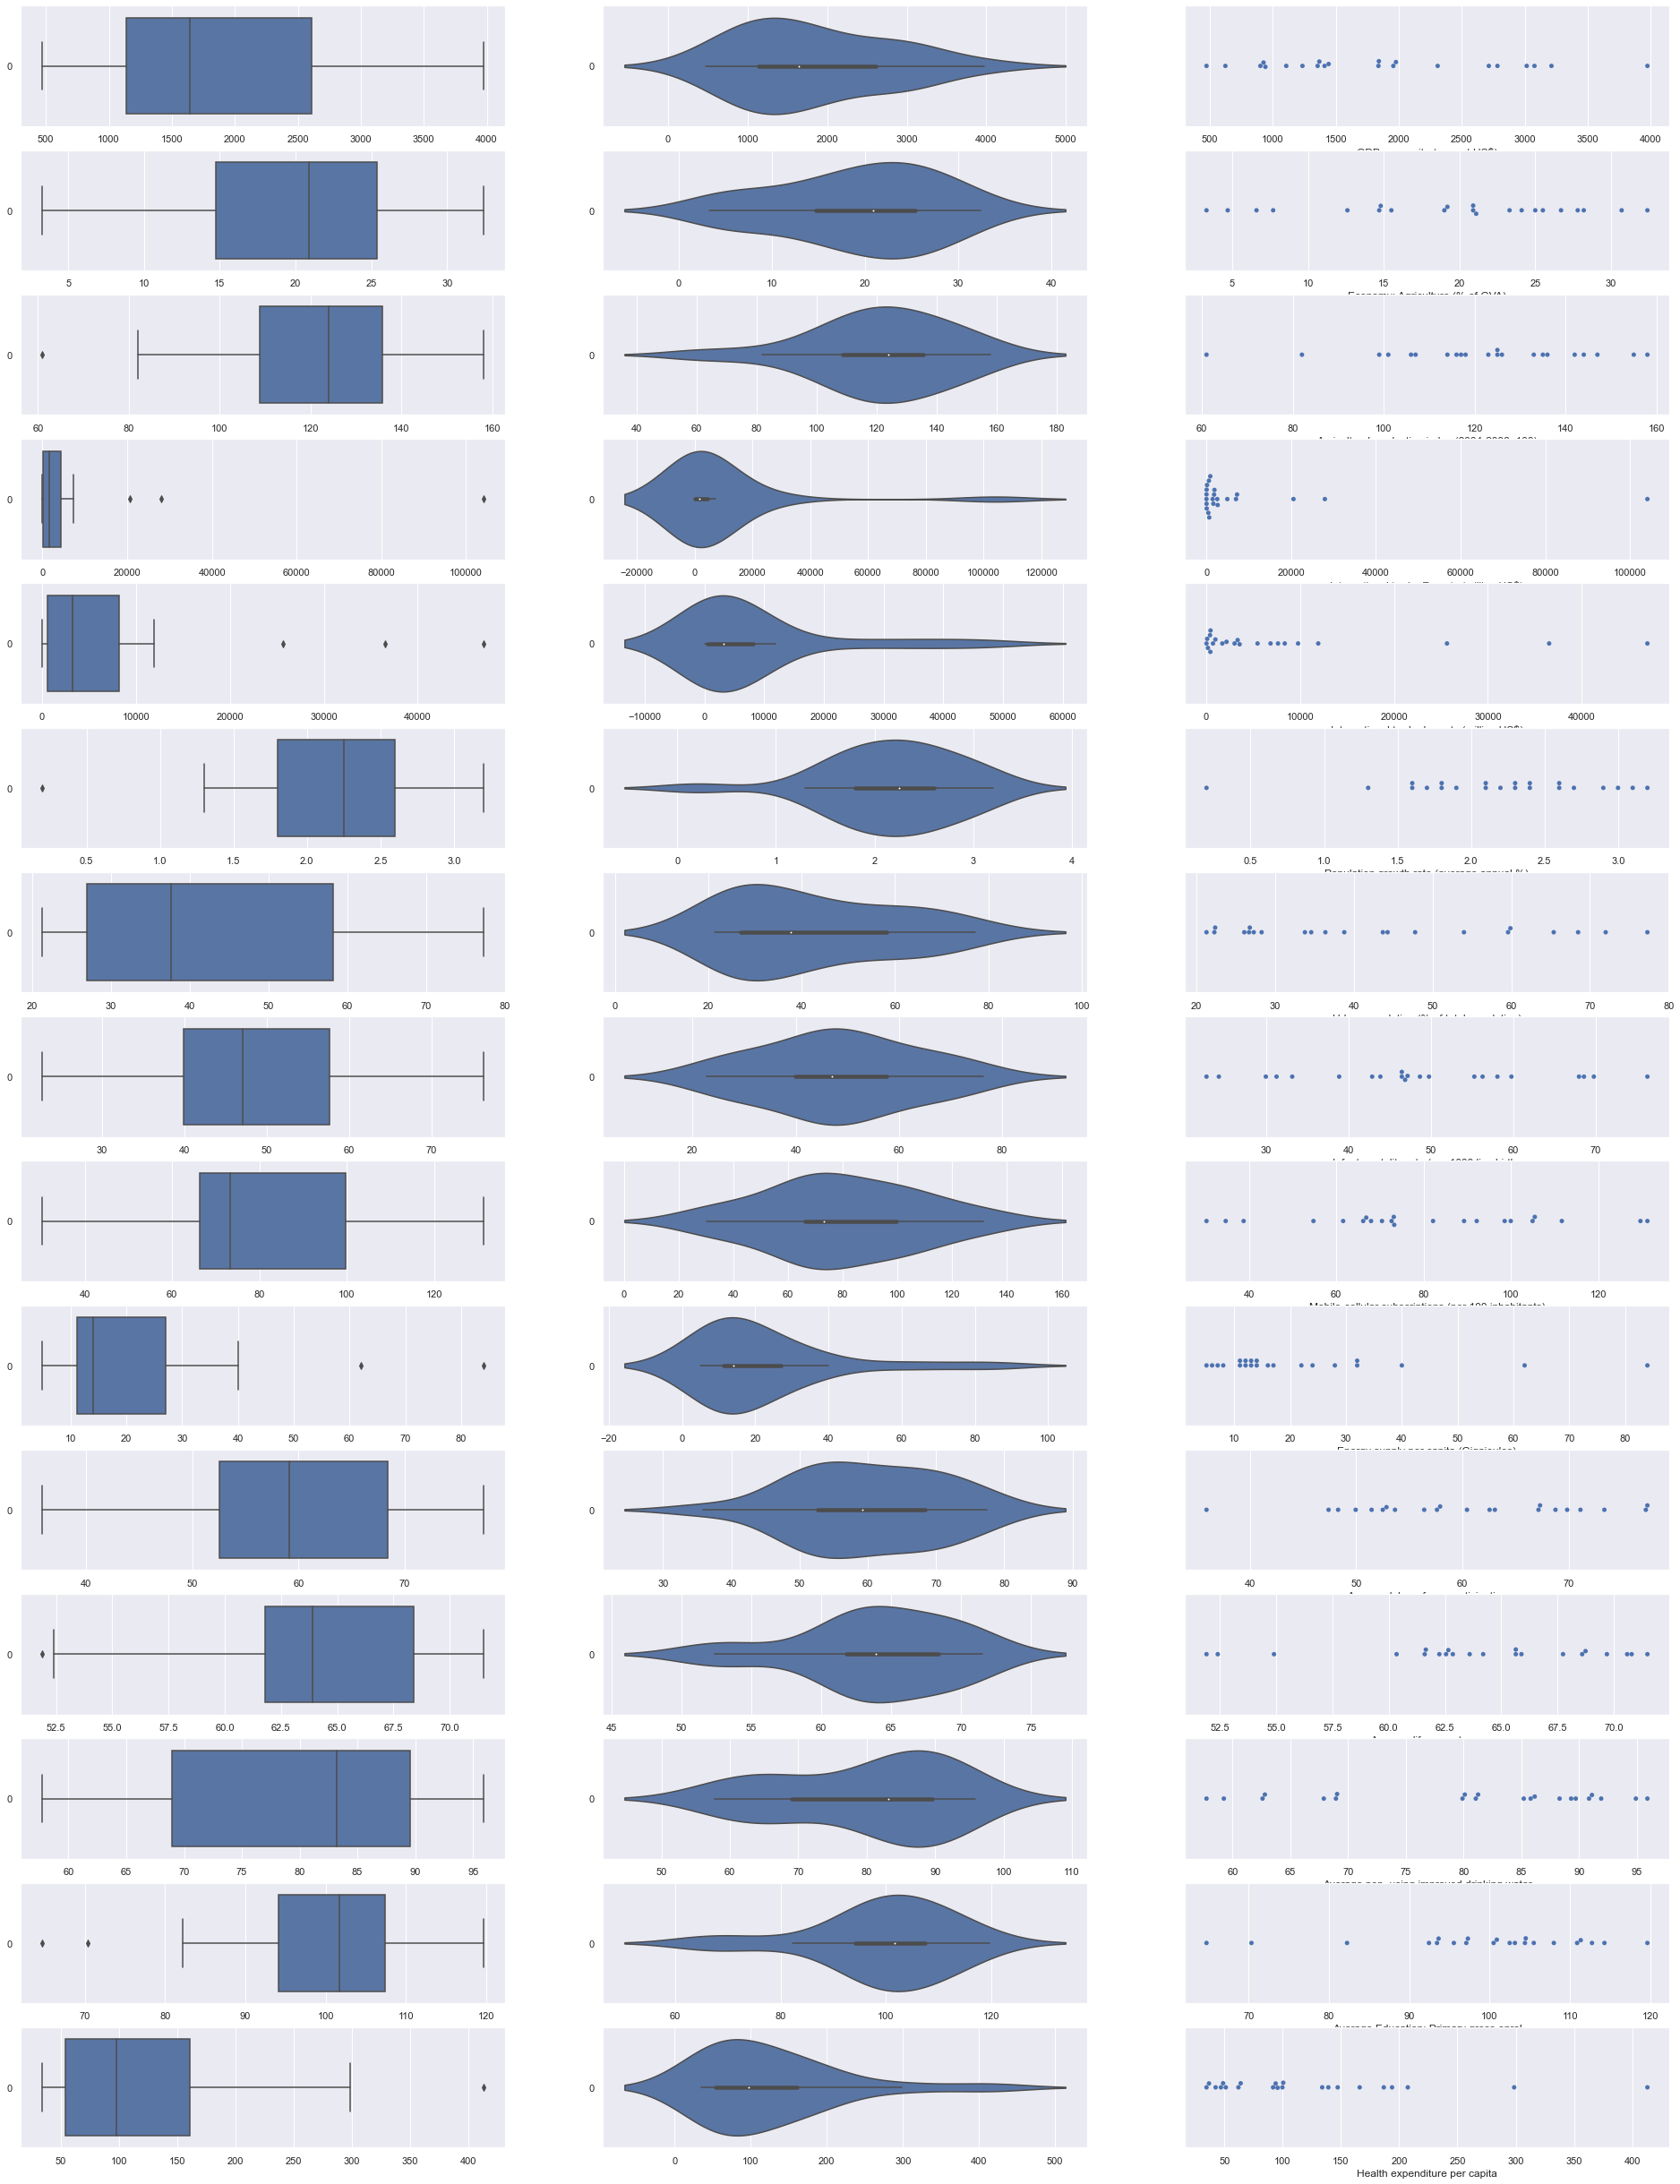

In [110]:
f, axes = plt.subplots(15, 3, figsize=(33, 44))
count = 0
final_data_cp2 = final_data_cp.copy()
final_data_cp2.pop("country")
final_data_cp2.pop("Region")
for var in final_data_cp2:
    sb.boxplot(data = final_data_cp2[var], orient = "h", ax = axes[count,0])
    sb.violinplot(data = final_data_cp2[var], orient = "h", ax = axes[count,1])
    sb.swarmplot(x = final_data_cp2[var], orient = "h", ax = axes[count,2])
    count += 1